# Ratings #

In this notebook we'll plot the company ratings.

- [1 Company](#1company)
- [Overall](#overall)

To see how the data was obtained, go to the [Scraping](scraping.html) notebook. For further analysis, go to the [Topic Modeling](topic-modeling.html) notebook.

In [1]:
from pymongo import MongoClient
import datetime
import reviews_data
# from nltk.tokenize import sent_tokenize, word_tokenize
# from nltk.corpus import stopwords
# import re
# import string
# from gensim import corpora, models, similarities
import matplotlib.pyplot as plt
import utils
import numpy as np

In [2]:
# DB settings
client = MongoClient()
indeed_db = client.indeed
indeed_jobs = indeed_db.jobs
indeed_reviews = indeed_db.reviews
glassdoor_db = client.glassdoor
glassdoor_reviews = glassdoor_db.reviews

In [3]:
companies = list(set(utils.get_company_names(indeed_reviews)))
ratings = reviews_data.all_ratings(indeed_reviews, glassdoor_reviews)

kept_ratings = []
# Drop ratings without any rating information
for rating in ratings:
    if len(rating) > 1:
        kept_ratings.append(rating)
ratings = kept_ratings
len(ratings)

188601

In [4]:
ratings[0]

{'Career Opportunities': 5,
 'Compensation and Benefits': 5,
 'Culture and Values': 5,
 'Management': 5,
 'Work and Life Balance': 5,
 'company': u'American Express',
 'rating': u'5.0'}

In [5]:
# returns the ratings for a company
# Possible keys: 'Comp & Benefits', 'Culture & Values','Career Opportunities', 
# 'Senior Management', 'Work/Life Balance', and 'rating'
def get_company_ratings(company, ratings, key):
    company_ratings = []
    for rating in ratings:
        if rating['company'].lower() == company.lower() and key in rating:
            company_ratings.append(float(rating[key]))
    return company_ratings

# Plot ratings histograms
def draw_scores(scores, title="", show = True, save = False):
    if len(scores) == 0:
        print "No scores to plot"
        return
    hist = np.histogram(scores,bins=5,range=[0.01,5.01])[0] # for rounding
    draw_hist(hist, title, show, save)

def draw_hist(hist, title = "", show = True, save = False):
    plt.figure(figsize=(8,6))
    plt.bar([x+0.6 for x in range(5)], hist)
    plt.title(title,fontsize=25)
    plt.xlabel("Stars",fontsize=16)
    plt.ylabel("Number of reviews",fontsize=16)
    plt.xticks([0,1,2,3,4,5])
    plt.tick_params(labelsize=12)
    if save:
        plt.savefig('images/' + title.replace('/','-').replace(' ','_') + ".png")
    if show: plt.show()
    plt.close()
    return
    
def draw_all_company_rating(rating_key, companies_list, title_end):
    for company in companies_list:
        scores = get_company_ratings(company, ratings, rating_key)
        title = company + title_end
        draw_scores(scores, title, False, True);

<a id='1company' />

## Plot 1 company's ratings ##

There are rating several categories: 'Career Opportunities', 'Compensation and Benefits', 'Culture and Values', 'Management', 'Work and Life Balance' and 'rating'.

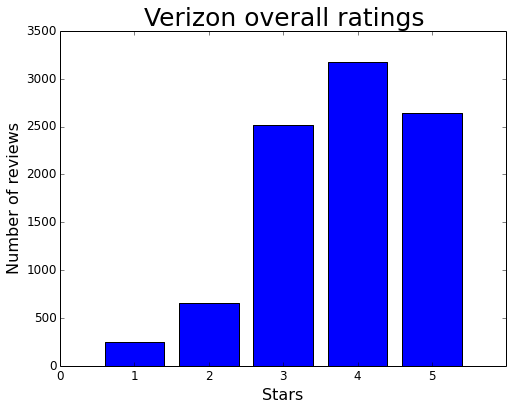

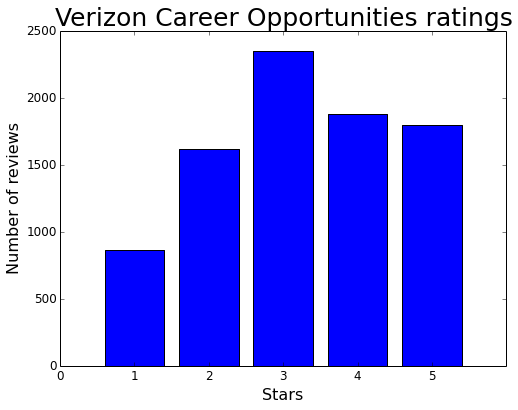

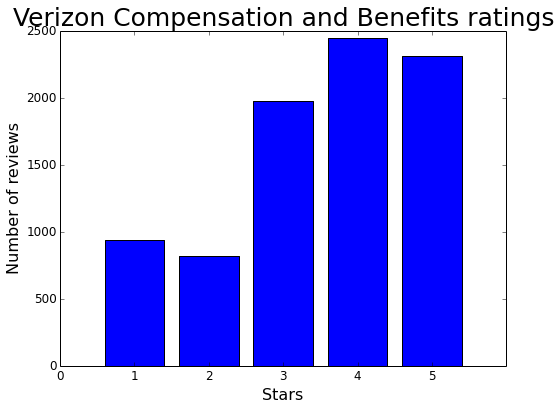

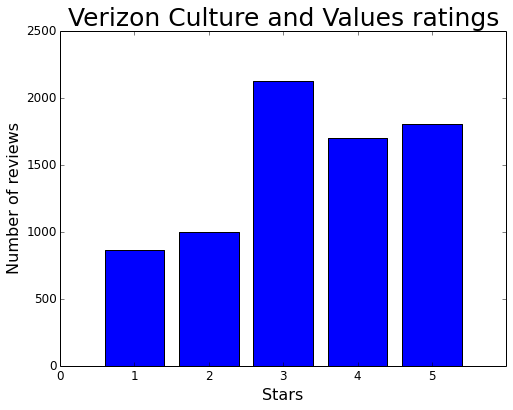

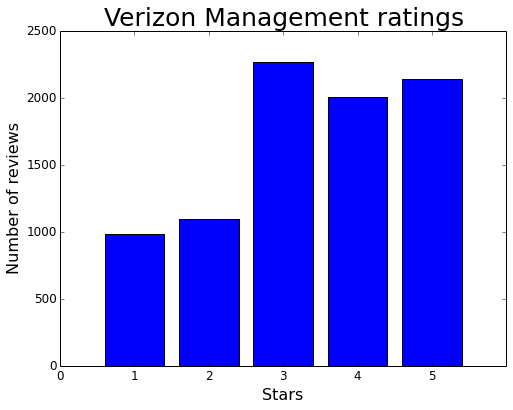

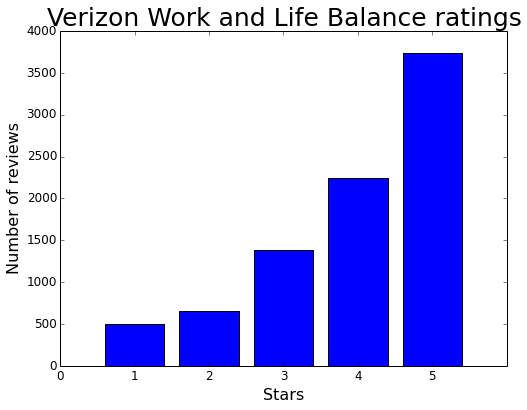

In [6]:
%matplotlib inline

company = companies[15]
rating_key = 'rating'

title = company + " overall ratings"
scores = get_company_ratings(company, ratings, rating_key)
draw_scores(scores, title)

rating_keys = ['Career Opportunities', 'Compensation and Benefits',
               'Culture and Values', 'Management', 'Work and Life Balance']
for rating_key in rating_keys:
    title = company + " " + rating_key + " ratings"
    scores = get_company_ratings(company, ratings, rating_key)
    draw_scores(scores, title)

# Plot all companies' ratings #

Plot all of the companies' ratings and save them as images.

In [7]:
rating_key = 'rating'
title_end = ' overall ratings'
draw_all_company_rating(rating_key, companies, title_end)

<a id='overall' />

# Overall Ratings #

In [8]:
import numpy as np

# average will divide by the number of ratings
def get_all_ratings(rating_key, average = False):
    total_ratings = np.zeros(5)
    for company in companies:
        company_ratings = get_company_ratings(company, ratings, rating_key)
        hist = np.histogram(company_ratings,bins=5,range=[0.01,5.01])[0]
        if average:
            hist = hist.astype(float) / sum(hist)
        total_ratings += hist
    return total_ratings

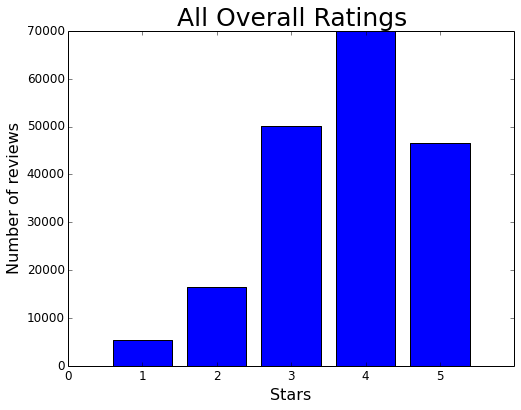

In [9]:
ratings_key = 'rating'
total_ratings = get_all_ratings(rating_key)
draw_hist(total_ratings, "All Overall Ratings", True, True)

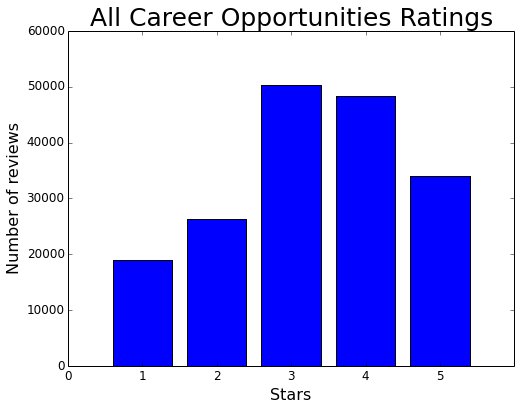

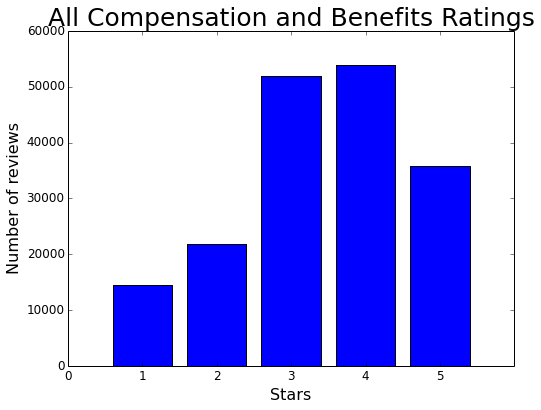

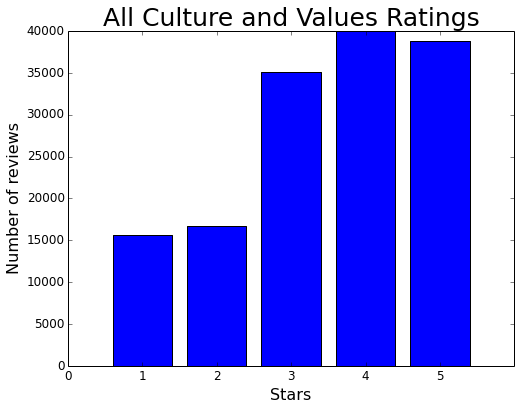

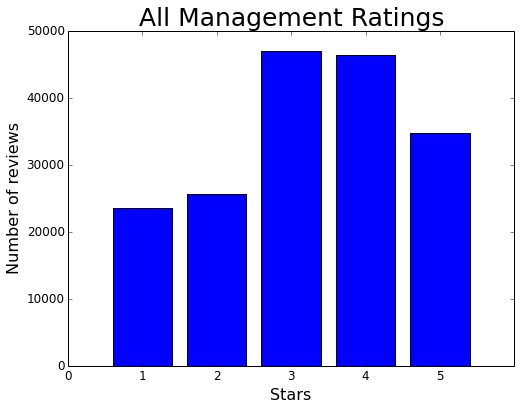

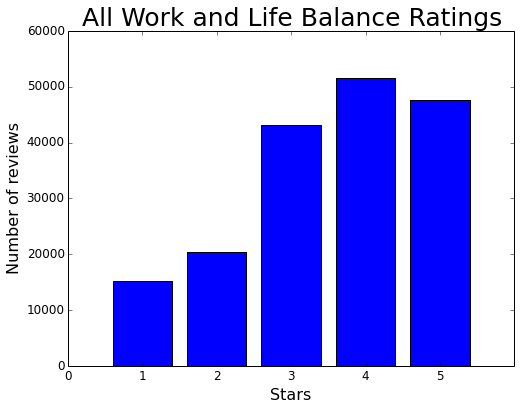

In [10]:
titles = ["All " + r + " Ratings" for r in rating_keys]

for key,title in zip(rating_keys, titles):
    total_ratings = get_all_ratings(key)
    draw_hist(total_ratings, title, True, True)

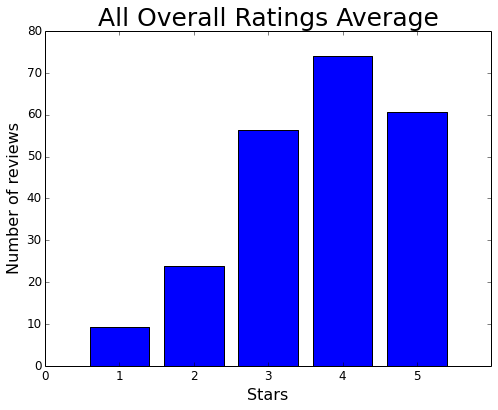

In [11]:
# Now without weighting by number of employees
ratings_key = 'rating'
total_ratings = get_all_ratings(rating_key, True)
draw_hist(total_ratings, "All Overall Ratings Average", True, True)

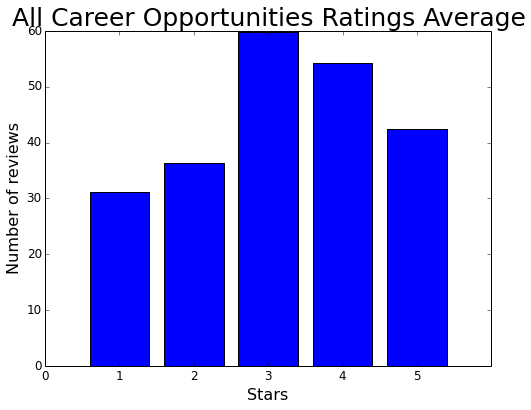

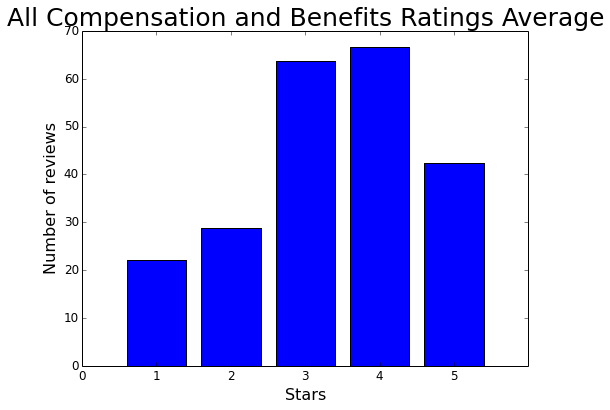

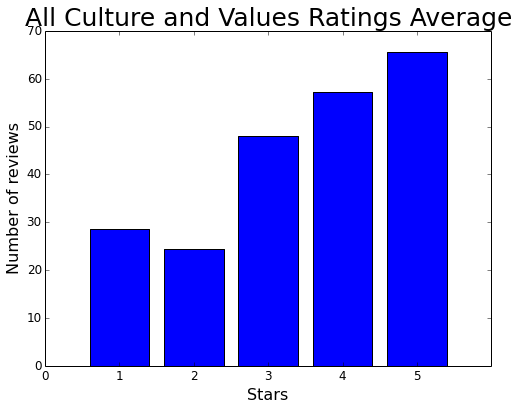

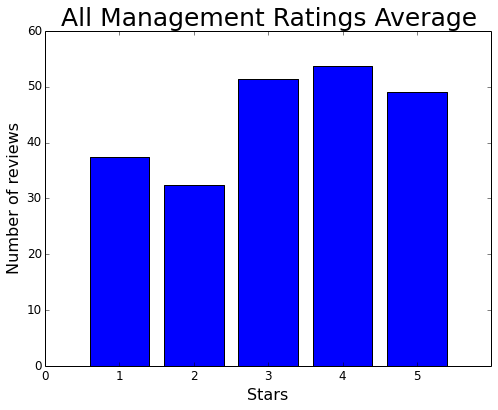

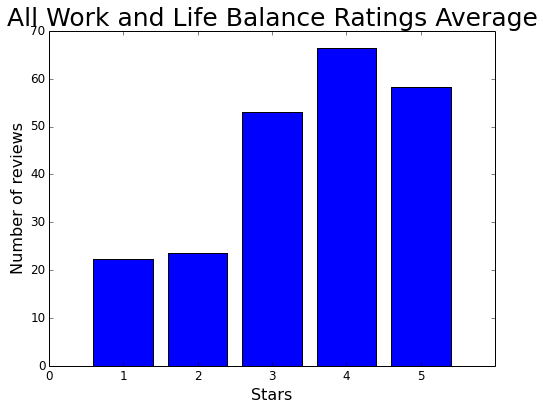

In [12]:
titles = ["All " + r + " Ratings Average" for r in rating_keys]

for key,title in zip(rating_keys, titles):
    total_ratings = get_all_ratings(key, True)
    draw_hist(total_ratings, title, True, True)